In [15]:
import numpy as np
from fractions import *

from time import perf_counter

import sys

sys.path.insert(1, "/Users/minhpham/Documents/Research/laughing-umbrella/xx_synthesis/monodromy")

import monodromy

from monodromy.coordinates import monodromy_alcove, monodromy_alcove_c2, monodromy_to_positive_canonical_polytope, rho_reflect
from monodromy.elimination import cylinderize, project
from monodromy.polytopes import ConvexPolytope, Polytope
from monodromy.static import qlr_polytope
from monodromy.method import *

from itertools import count

import os

import matplotlib.pyplot as plt

from scipy import stats

/Users/minhpham/Documents/Research/laughing-umbrella/xx_synthesis/monodromy/lrslib-071b/lrs


How does the intersection between $p_0$ and $p_3$ changes as the upper bound for the range of $\alpha$ increases form $\frac{\pi}{8}$ to $\frac{\pi}{4}$? My thought is it would be a monotonic decrease.

### Generate n=3 polytope for a variety of angles between $\frac{\pi}{8}$ and $\frac{\pi}{4}$

In [16]:
file = open("/Users/minhpham/Documents/Research/laughing-umbrella/xx_synthesis/inequalities/massive.txt", "r")

polytope_dict = eval(file.read()[63:])

In [23]:
sorted(polytope_dict.keys())

[Fraction(1, 4),
 Fraction(13, 48),
 Fraction(11, 40),
 Fraction(7, 24),
 Fraction(5, 16),
 Fraction(1, 3),
 Fraction(17, 48),
 Fraction(3, 8),
 Fraction(19, 48),
 Fraction(5, 12),
 Fraction(7, 16),
 Fraction(11, 24),
 Fraction(23, 48),
 Fraction(1, 2)]

### Compute the volume of the intersection of p0 and p3 wrt p3

In [19]:
volume_dict = dict()
for angle in sorted(polytope_dict.keys()):
    if len(polytope_dict[angle][3].convex_subpolytopes) ==4:
        p0 = polytope_dict[angle][3].convex_subpolytopes[0]
        p1 = polytope_dict[angle][3].convex_subpolytopes[1]
        p2 = polytope_dict[angle][3].convex_subpolytopes[2]
        p3 = polytope_dict[angle][3].convex_subpolytopes[3]
        
        ratio1 = ((p0.intersect(p3)).volume.volume / p3.volume.volume)
        ratio2 = ((p1.intersect(p2)).volume.volume / p2.volume.volume)
        
        assert ratio1 == ratio2, f"{angle} is kinda weird"
        
        volume_dict[angle] = float(ratio1)

In [20]:
volume_dict

{Fraction(17, 48): 0.9999997902642639,
 Fraction(3, 8): 0.9999951764062024,
 Fraction(19, 48): 0.9999731264497832,
 Fraction(5, 12): 0.9999155005464834,
 Fraction(7, 16): 0.9998049373330069,
 Fraction(11, 24): 0.9996288544982941,
 Fraction(23, 48): 0.9993815792766527,
 Fraction(1, 2): 0.9990653533683227}

### Plot these volume vs angle

In [229]:
x = list(volume_dict.keys())
y = np.array([volume_dict[angle] for angle in x])
x = np.array([float(elem) for elem in x])

fig, ax = plt.subplots()

ax.set_title("Percentage coverage vs. Maximum Angle")
ax.set_xlabel("Maximum Angle")
ax.set_ylabel("Percentage Coverage")
ax.scatter(x, (1-y)**(1/3), s = 10)

Slope: 0.6423835183838505
Intercept: -0.22316350968844154
R-squared: 0.9992418546686702


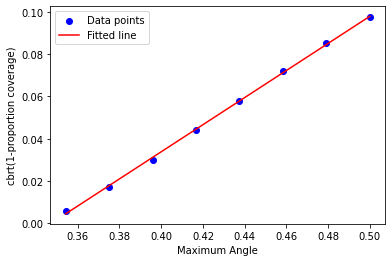

In [236]:
# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, (1-y)**(1/3))

# Print the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")

# Plot the data and the regression line
plt.scatter(x, (1-y)**(1/3), color='blue', label='Data points')
plt.plot(x, slope*x + intercept, color='red', label='Fitted line')
plt.xlabel('Maximum Angle')
plt.ylabel('cbrt(1-proportion coverage)')
plt.legend()
plt.show()

### Apply cubic regression

Coefficients: [-20.42822255  19.89886545  -6.35102337 100.66057178]


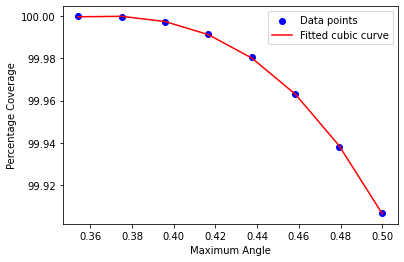

In [244]:
# Fit a cubic polynomial to the data
coefficients = np.polyfit(x, 100*y, 3)

# Generate fitted values
y_fit = np.polyval(coefficients, x)

# Print the coefficients
print(f"Coefficients: {coefficients}")

# Plot the data and the fitted polynomial curve
plt.scatter(x, 100*y, color='blue', label='Data points')
plt.plot(x, y_fit, color='red', label='Fitted cubic curve')
plt.xlabel('Maximum Angle')
plt.ylabel('Percentage Coverage')
plt.legend()
plt.show()

In [245]:
222223/666667

0.33333433333283335

In [247]:
1/3+1e-4

0.3334333333333333